# OpenFlights Routes Network Analysis

## Dataset  
The analysis uses the **OpenFlights Routes dataset**, which contains global airline routes.  
- **Nodes** = airports  
- **Edges** = direct flight routes between airports  

Because the dataset includes some small disconnected groups of airports, the analysis is restricted to the **largest connected component**, representing the main global air traffic network.



## Graph Construction  
A graph was built in **NetworkX** from the `routes.dat` file (loaded from a GitHub mirror).  
The focus is on the **largest connected component** to ensure metrics such as diameter are meaningful.  



## Metrics  
For the largest connected component, the following were calculated:  
- **Diameter:** 13  
- **Average path length:** 4.10  
- **Average clustering coefficient:** 0.488  



## Results  
- **Nodes (airports):** 3,425 in total; 3,397 in the largest component  
- **Edges (routes):** 19,257 in total; 19,231 in the largest component  
- **Diameter (largest component):** 13  
- **Average path length (largest component):** 4.10  
- **Average clustering coefficient (largest component):** 0.488  

This indicates that almost the entire network (over 99%) is part of one giant connected component. Only **28 airports** are isolated in smaller disconnected groups, typically small regional airports with very limited connectivity.

These results show that most airports are connected through only a few flights, reflecting the “small world” nature of air travel. The relatively high clustering highlights the importance of regional hubs.

On average, any two airports are separated by about 4 flights. While that may seem large from a passenger’s perspective, in network science this is considered short relative to the total size of the system, demonstrating the small-world property of the global airline network. In practice, most travelers between major hubs require far fewer steps, typically 1–2 flights.


## Visualization  
Two visualizations are included:  
1. A quick **NetworkX plot** (Python).  
2. A more polished **Gephi visualization** (`openflights_graph.graphml`), where airports can be sized by degree (connections) and colored by centrality, making global hub airports stand out clearly.


Total nodes: 3425
Total edges: 19257
Nodes in largest component: 3397
Edges in largest component: 19231
Diameter: 13
Average path length: 4.103241167898093
Average clustering coefficient: 0.48833620245296055


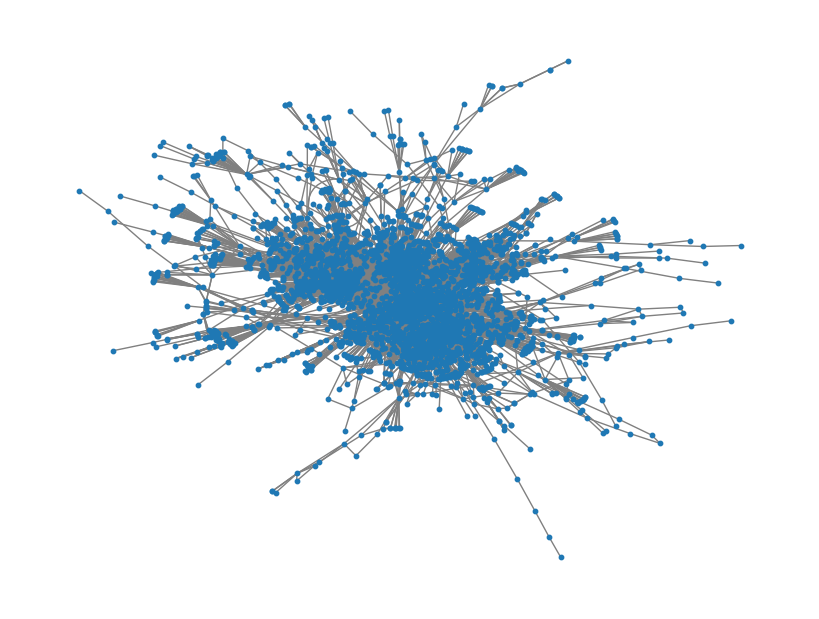

Graph exported to 'openflights_graph.graphml' — open this in Gephi!


In [24]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Always show plots inside notebook
%matplotlib inline 

# 1. Load routes directly from OpenFlights GitHub (no need to download manually)
url = "https://raw.githubusercontent.com/jpatokal/openflights/master/data/routes.dat"
routes = pd.read_csv(url, header=None)

# 2. Build graph (source airport = col 2, destination airport = col 4)
G = nx.from_pandas_edgelist(routes, source=2, target=4, create_using=nx.Graph)

print("Total nodes:", G.number_of_nodes())
print("Total edges:", G.number_of_edges())

# 3. Restrict to the largest connected component
largest_cc = max(nx.connected_components(G), key=len)
G_largest = G.subgraph(largest_cc).copy()

print("Nodes in largest component:", G_largest.number_of_nodes())
print("Edges in largest component:", G_largest.number_of_edges())

# 4. Metrics
print("Diameter:", nx.diameter(G_largest))
print("Average path length:", nx.average_shortest_path_length(G_largest))
print("Average clustering coefficient:", nx.average_clustering(G_largest))

# 5. Quick visualization
plt.figure(figsize=(8,6))
nx.draw(G_largest, node_size=10, edge_color="gray", with_labels=False)
plt.show()

# 6. Export to Gephi (GraphML format)
nx.write_graphml(G_largest, "openflights_graph.graphml")
print("Graph exported to 'openflights_graph.graphml' — open this in Gephi!")